In [9]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


In [10]:
num_classes = 10
input_shape = (28, 28, 1)

# Load data and split it to train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Scale pictures (values from 0-255 to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [11]:
model = keras.Sequential([
    # First Layer
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    # Second Layer
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # Third Layer
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
batch_size = 6
epochs = 8

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.20)


Epoch 1/10
9375/9375 [==============================] - 29s 3ms/step - loss: 1.3724 - accuracy: 0.5043 - val_loss: 1.1463 - val_accuracy: 0.5949
Epoch 2/10
9375/9375 [==============================] - 30s 3ms/step - loss: 1.0188 - accuracy: 0.6389 - val_loss: 1.0237 - val_accuracy: 0.6390
Epoch 3/10
9375/9375 [==============================] - 30s 3ms/step - loss: 0.8527 - accuracy: 0.7005 - val_loss: 1.0149 - val_accuracy: 0.6494
Epoch 4/10
9375/9375 [==============================] - 30s 3ms/step - loss: 0.7319 - accuracy: 0.7427 - val_loss: 0.9896 - val_accuracy: 0.6749
Epoch 5/10
9375/9375 [==============================] - 32s 3ms/step - loss: 0.6362 - accuracy: 0.7766 - val_loss: 1.0346 - val_accuracy: 0.6722
Epoch 6/10
9375/9375 [==============================] - 32s 3ms/step - loss: 0.5432 - accuracy: 0.8078 - val_loss: 1.1062 - val_accuracy: 0.6722
Epoch 7/10
9375/9375 [==============================] - 32s 3ms/step - loss: 0.4636 - accuracy: 0.8339 - val_loss: 1.2590 - val_ac

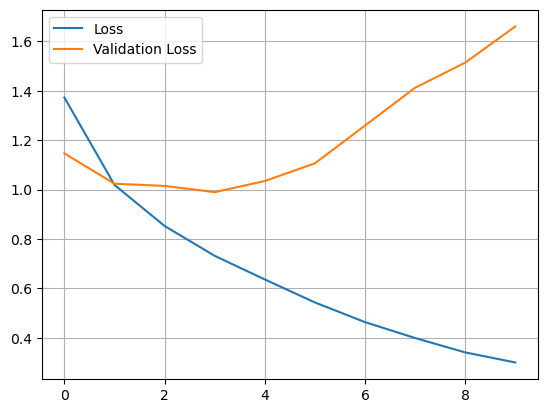

In [13]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.show()


In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 1.6928273439407349
Test accuracy: 0.6582000255584717


1/1 [==============================] - 0s 47ms/step


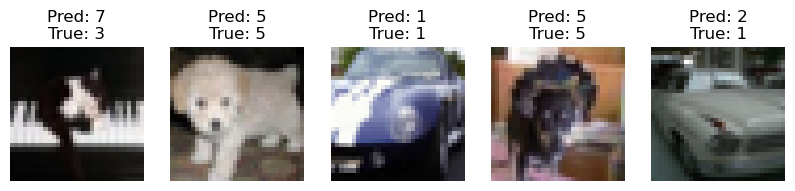

In [15]:
import random

# Choose random images
num_images = 5
indices = random.sample(range(len(x_test)), num_images)
sample_images = x_test[indices]
sample_labels = y_test[indices]

# Predict with the model
predictions = model.predict(sample_images)

# Show the images and predictions
fig, axes = plt.subplots(1, num_images, figsize=(10,3))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i])
    ax.set_title(f"Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(sample_labels[i])}")
    ax.axis('off')

plt.show()
